In [1]:
import numpy as np
from torch.utils.data import DataLoader
from vae.datasets import VolSurfaceDataSet
from vae.dense_vae import VAEDense
from vae.conv_vae import VAEConv2D
from vae.cvae import CVAE
from vae.utils import *

In [2]:
set_seeds(0)

# Load Data

In [3]:
data = np.load("data/vol_surface.npy")
print(data.shape)

(5532, 5, 5)


In [4]:
train_dataset = VolSurfaceDataSet(data[:4000], 1)
train_dataloader = DataLoader(train_dataset, shuffle=False, batch_size=64)
valid_dataset = VolSurfaceDataSet(data[4000:5000], 1)
valid_dataloader = DataLoader(valid_dataset, shuffle=False, batch_size=16)
test_dataset = VolSurfaceDataSet(data[5000:], 1)
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=16)

# Dense VAE

In [5]:
config = {
    "seq_len": 1, 
    "feat_dim": (5, 5),
    "latent_dim": 10,
    "device": "cuda",
    "kl_weight": 1.0,
    "hidden": [50, 100],
}
model_dense = VAEDense(config)
print(model_dense)

VAEDense(
  (encoder): DenseEncoder(
    (encoder_layers): Sequential(
      (flatten): Flatten(start_dim=1, end_dim=-1)
      (enc_dense_0): Linear(in_features=25, out_features=50, bias=True)
      (enc_activation_0): ReLU()
      (enc_dense_1): Linear(in_features=50, out_features=100, bias=True)
      (enc_activation_1): ReLU()
    )
    (z_mean_layer): Linear(in_features=100, out_features=10, bias=True)
    (z_log_var_layer): Linear(in_features=100, out_features=10, bias=True)
  )
  (decoder): DenseDecoder(
    (decoder_layers): Sequential(
      (dec_dense_0): Linear(in_features=10, out_features=100, bias=True)
      (dec_activation_0): ReLU()
      (dec_dense_1): Linear(in_features=100, out_features=50, bias=True)
      (dec_activation_1): ReLU()
      (dec_output): Linear(in_features=50, out_features=25, bias=True)
    )
  )
)


In [6]:
train(model_dense, train_dataloader, valid_dataloader, epochs=100, model_dir="test", file_name="dense_vae.pt")

eval: 100%|██████████| 63/63 [00:00<00:00, 844.74it/s]


epoch 0: train loss :: 0.111, dev loss :: 0.091, time elapsed :: 1.1292688846588135


eval: 100%|██████████| 63/63 [00:00<00:00, 947.56it/s]


epoch 1: train loss :: 0.102, dev loss :: 0.083, time elapsed :: 0.31017160415649414


eval: 100%|██████████| 63/63 [00:00<00:00, 1118.86it/s]


epoch 2: train loss :: 0.093, dev loss :: 0.075, time elapsed :: 0.31630420684814453


eval: 100%|██████████| 63/63 [00:00<00:00, 1400.03it/s]


epoch 3: train loss :: 0.086, dev loss :: 0.069, time elapsed :: 0.2783334255218506


eval: 100%|██████████| 63/63 [00:00<00:00, 1004.12it/s]


epoch 4: train loss :: 0.079, dev loss :: 0.062, time elapsed :: 0.2982363700866699


eval: 100%|██████████| 63/63 [00:00<00:00, 1210.59it/s]


epoch 5: train loss :: 0.072, dev loss :: 0.057, time elapsed :: 0.3036205768585205


eval: 100%|██████████| 63/63 [00:00<00:00, 1181.35it/s]


epoch 6: train loss :: 0.066, dev loss :: 0.051, time elapsed :: 0.30233192443847656


eval: 100%|██████████| 63/63 [00:00<00:00, 1340.40it/s]


epoch 7: train loss :: 0.061, dev loss :: 0.046, time elapsed :: 0.2816941738128662


eval: 100%|██████████| 63/63 [00:00<00:00, 1155.72it/s]


epoch 8: train loss :: 0.055, dev loss :: 0.042, time elapsed :: 0.3076488971710205


eval: 100%|██████████| 63/63 [00:00<00:00, 1339.82it/s]


epoch 9: train loss :: 0.051, dev loss :: 0.038, time elapsed :: 0.30207133293151855


eval: 100%|██████████| 63/63 [00:00<00:00, 1191.33it/s]


epoch 10: train loss :: 0.046, dev loss :: 0.034, time elapsed :: 0.2882063388824463


eval: 100%|██████████| 63/63 [00:00<00:00, 1143.57it/s]


epoch 11: train loss :: 0.042, dev loss :: 0.030, time elapsed :: 0.31355834007263184


eval: 100%|██████████| 63/63 [00:00<00:00, 1431.92it/s]


epoch 12: train loss :: 0.038, dev loss :: 0.027, time elapsed :: 0.2730128765106201


eval: 100%|██████████| 63/63 [00:00<00:00, 1166.89it/s]


epoch 13: train loss :: 0.035, dev loss :: 0.024, time elapsed :: 0.30106329917907715


eval: 100%|██████████| 63/63 [00:00<00:00, 1032.79it/s]


epoch 14: train loss :: 0.032, dev loss :: 0.022, time elapsed :: 0.3359067440032959


eval: 100%|██████████| 63/63 [00:00<00:00, 1315.48it/s]


epoch 15: train loss :: 0.029, dev loss :: 0.020, time elapsed :: 0.28260040283203125


eval: 100%|██████████| 63/63 [00:00<00:00, 1262.28it/s]


epoch 16: train loss :: 0.026, dev loss :: 0.018, time elapsed :: 0.31088972091674805


eval: 100%|██████████| 63/63 [00:00<00:00, 1312.58it/s]


epoch 17: train loss :: 0.024, dev loss :: 0.016, time elapsed :: 0.2921006679534912


eval: 100%|██████████| 63/63 [00:00<00:00, 1369.34it/s]


epoch 18: train loss :: 0.022, dev loss :: 0.015, time elapsed :: 0.26700425148010254


eval: 100%|██████████| 63/63 [00:00<00:00, 1211.56it/s]


epoch 19: train loss :: 0.020, dev loss :: 0.013, time elapsed :: 0.2855992317199707


eval: 100%|██████████| 63/63 [00:00<00:00, 1369.12it/s]


epoch 20: train loss :: 0.019, dev loss :: 0.012, time elapsed :: 0.2719757556915283


eval: 100%|██████████| 63/63 [00:00<00:00, 1260.04it/s]


epoch 21: train loss :: 0.017, dev loss :: 0.011, time elapsed :: 0.2742021083831787


eval: 100%|██████████| 63/63 [00:00<00:00, 1365.07it/s]


epoch 22: train loss :: 0.016, dev loss :: 0.011, time elapsed :: 0.27133989334106445


eval: 100%|██████████| 63/63 [00:00<00:00, 1285.73it/s]


epoch 23: train loss :: 0.015, dev loss :: 0.010, time elapsed :: 0.2672450542449951


eval: 100%|██████████| 63/63 [00:00<00:00, 1369.69it/s]


epoch 24: train loss :: 0.014, dev loss :: 0.010, time elapsed :: 0.2825043201446533


eval: 100%|██████████| 63/63 [00:00<00:00, 1147.55it/s]


epoch 25: train loss :: 0.014, dev loss :: 0.009, time elapsed :: 0.285015344619751


eval: 100%|██████████| 63/63 [00:00<00:00, 1167.52it/s]


epoch 26: train loss :: 0.013, dev loss :: 0.009, time elapsed :: 0.3082091808319092


eval: 100%|██████████| 63/63 [00:00<00:00, 1355.65it/s]


epoch 27: train loss :: 0.012, dev loss :: 0.009, time elapsed :: 0.27988648414611816


eval: 100%|██████████| 63/63 [00:00<00:00, 1145.59it/s]


epoch 28: train loss :: 0.012, dev loss :: 0.008, time elapsed :: 0.285001277923584


eval: 100%|██████████| 63/63 [00:00<00:00, 1112.22it/s]


epoch 29: train loss :: 0.012, dev loss :: 0.008, time elapsed :: 0.28166961669921875


eval: 100%|██████████| 63/63 [00:00<00:00, 1096.96it/s]


epoch 30: train loss :: 0.011, dev loss :: 0.008, time elapsed :: 0.30088019371032715


eval: 100%|██████████| 63/63 [00:00<00:00, 1285.76it/s]


epoch 31: train loss :: 0.011, dev loss :: 0.008, time elapsed :: 0.2687053680419922


eval: 100%|██████████| 63/63 [00:00<00:00, 1396.66it/s]


epoch 32: train loss :: 0.011, dev loss :: 0.008, time elapsed :: 0.30129122734069824


eval: 100%|██████████| 63/63 [00:00<00:00, 1211.67it/s]


epoch 33: train loss :: 0.011, dev loss :: 0.008, time elapsed :: 0.28663134574890137


eval: 100%|██████████| 63/63 [00:00<00:00, 1259.77it/s]


epoch 34: train loss :: 0.010, dev loss :: 0.008, time elapsed :: 0.2686915397644043


eval: 100%|██████████| 63/63 [00:00<00:00, 1199.06it/s]


epoch 35: train loss :: 0.010, dev loss :: 0.008, time elapsed :: 0.2729170322418213


eval: 100%|██████████| 63/63 [00:00<00:00, 1135.77it/s]


epoch 36: train loss :: 0.010, dev loss :: 0.008, time elapsed :: 0.2607133388519287


eval: 100%|██████████| 63/63 [00:00<00:00, 1428.50it/s]


epoch 37: train loss :: 0.010, dev loss :: 0.008, time elapsed :: 0.257892370223999


eval: 100%|██████████| 63/63 [00:00<00:00, 1340.77it/s]


epoch 38: train loss :: 0.010, dev loss :: 0.008, time elapsed :: 0.30565929412841797


eval: 100%|██████████| 63/63 [00:00<00:00, 1368.53it/s]


epoch 39: train loss :: 0.010, dev loss :: 0.008, time elapsed :: 0.28049182891845703


eval: 100%|██████████| 63/63 [00:00<00:00, 1400.50it/s]


epoch 40: train loss :: 0.010, dev loss :: 0.007, time elapsed :: 0.26901721954345703


eval: 100%|██████████| 63/63 [00:00<00:00, 1288.40it/s]


epoch 41: train loss :: 0.010, dev loss :: 0.007, time elapsed :: 0.279116153717041


eval: 100%|██████████| 63/63 [00:00<00:00, 1399.98it/s]


epoch 42: train loss :: 0.010, dev loss :: 0.007, time elapsed :: 0.28159022331237793


eval: 100%|██████████| 63/63 [00:00<00:00, 1168.93it/s]


epoch 43: train loss :: 0.010, dev loss :: 0.008, time elapsed :: 0.2695043087005615


eval: 100%|██████████| 63/63 [00:00<00:00, 1274.03it/s]


epoch 44: train loss :: 0.010, dev loss :: 0.007, time elapsed :: 0.27310824394226074


eval: 100%|██████████| 63/63 [00:00<00:00, 1402.96it/s]


epoch 45: train loss :: 0.010, dev loss :: 0.007, time elapsed :: 0.2790544033050537


eval: 100%|██████████| 63/63 [00:00<00:00, 1343.47it/s]


epoch 46: train loss :: 0.010, dev loss :: 0.007, time elapsed :: 0.2638216018676758


eval: 100%|██████████| 63/63 [00:00<00:00, 1399.83it/s]


epoch 47: train loss :: 0.010, dev loss :: 0.007, time elapsed :: 0.2670159339904785


eval: 100%|██████████| 63/63 [00:00<00:00, 1166.59it/s]


epoch 48: train loss :: 0.010, dev loss :: 0.007, time elapsed :: 0.28548431396484375


eval: 100%|██████████| 63/63 [00:00<00:00, 1396.51it/s]


epoch 49: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2807502746582031


eval: 100%|██████████| 63/63 [00:00<00:00, 1431.57it/s]


epoch 50: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2700042724609375


eval: 100%|██████████| 63/63 [00:00<00:00, 1465.61it/s]


epoch 51: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2887406349182129


eval: 100%|██████████| 63/63 [00:00<00:00, 1459.73it/s]


epoch 52: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.25808048248291016


eval: 100%|██████████| 63/63 [00:00<00:00, 1312.88it/s]


epoch 53: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2642345428466797


eval: 100%|██████████| 63/63 [00:00<00:00, 1431.85it/s]


epoch 54: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.28067898750305176


eval: 100%|██████████| 63/63 [00:00<00:00, 1259.68it/s]


epoch 55: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2690854072570801


eval: 100%|██████████| 63/63 [00:00<00:00, 1167.84it/s]


epoch 56: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.28122878074645996


eval: 100%|██████████| 63/63 [00:00<00:00, 1287.52it/s]


epoch 57: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.305894136428833


eval: 100%|██████████| 63/63 [00:00<00:00, 1465.11it/s]


epoch 58: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2817678451538086


eval: 100%|██████████| 63/63 [00:00<00:00, 1532.44it/s]


epoch 59: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.311962366104126


eval: 100%|██████████| 63/63 [00:00<00:00, 1330.59it/s]


epoch 60: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.25322747230529785


eval: 100%|██████████| 63/63 [00:00<00:00, 1188.46it/s]


epoch 61: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2625720500946045


eval: 100%|██████████| 63/63 [00:00<00:00, 1288.74it/s]


epoch 62: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.30608582496643066


eval: 100%|██████████| 63/63 [00:00<00:00, 1400.14it/s]


epoch 63: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.28841686248779297


eval: 100%|██████████| 63/63 [00:00<00:00, 1285.49it/s]


epoch 64: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2682487964630127


eval: 100%|██████████| 63/63 [00:00<00:00, 1428.01it/s]


epoch 65: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.31362414360046387


eval: 100%|██████████| 63/63 [00:00<00:00, 1237.80it/s]


epoch 66: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2944786548614502


eval: 100%|██████████| 63/63 [00:00<00:00, 1340.46it/s]


epoch 67: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.30411314964294434


eval: 100%|██████████| 63/63 [00:00<00:00, 1125.19it/s]


epoch 68: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2789802551269531


eval: 100%|██████████| 63/63 [00:00<00:00, 1235.35it/s]


epoch 69: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2759859561920166


eval: 100%|██████████| 63/63 [00:00<00:00, 1354.44it/s]


epoch 70: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.3225259780883789


eval: 100%|██████████| 63/63 [00:00<00:00, 1147.38it/s]


epoch 71: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.28396034240722656


eval: 100%|██████████| 63/63 [00:00<00:00, 1311.42it/s]


epoch 72: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.28267574310302734


eval: 100%|██████████| 63/63 [00:00<00:00, 1373.19it/s]


epoch 73: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.27764463424682617


eval: 100%|██████████| 63/63 [00:00<00:00, 1369.68it/s]


epoch 74: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.26754069328308105


eval: 100%|██████████| 63/63 [00:00<00:00, 1431.36it/s]


epoch 75: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.27360081672668457


eval: 100%|██████████| 63/63 [00:00<00:00, 1464.99it/s]


epoch 76: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2848985195159912


eval: 100%|██████████| 63/63 [00:00<00:00, 1340.45it/s]


epoch 77: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2671163082122803


eval: 100%|██████████| 63/63 [00:00<00:00, 1312.09it/s]


epoch 78: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2849712371826172


eval: 100%|██████████| 63/63 [00:00<00:00, 1341.62it/s]


epoch 79: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2710304260253906


eval: 100%|██████████| 63/63 [00:00<00:00, 1369.61it/s]


epoch 80: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2769956588745117


eval: 100%|██████████| 63/63 [00:00<00:00, 1049.69it/s]


epoch 81: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.3250596523284912


eval: 100%|██████████| 63/63 [00:00<00:00, 1464.70it/s]


epoch 82: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.25548672676086426


eval: 100%|██████████| 63/63 [00:00<00:00, 1465.16it/s]


epoch 83: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.29014015197753906


eval: 100%|██████████| 63/63 [00:00<00:00, 1105.00it/s]


epoch 84: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2850189208984375


eval: 100%|██████████| 63/63 [00:00<00:00, 1465.14it/s]


epoch 85: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.27349424362182617


eval: 100%|██████████| 63/63 [00:00<00:00, 1499.79it/s]


epoch 86: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.25552916526794434


eval: 100%|██████████| 63/63 [00:00<00:00, 893.32it/s]


epoch 87: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2870469093322754


eval: 100%|██████████| 63/63 [00:00<00:00, 1431.32it/s]


epoch 88: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2536318302154541


eval: 100%|██████████| 63/63 [00:00<00:00, 1315.44it/s]


epoch 89: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.27498531341552734


eval: 100%|██████████| 63/63 [00:00<00:00, 1289.70it/s]


epoch 90: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.30140233039855957


eval: 100%|██████████| 63/63 [00:00<00:00, 1328.65it/s]


epoch 91: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.27694249153137207


eval: 100%|██████████| 63/63 [00:00<00:00, 1285.43it/s]


epoch 92: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2719104290008545


eval: 100%|██████████| 63/63 [00:00<00:00, 1400.10it/s]


epoch 93: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.28605079650878906


eval: 100%|██████████| 63/63 [00:00<00:00, 1431.79it/s]


epoch 94: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2881917953491211


eval: 100%|██████████| 63/63 [00:00<00:00, 1342.91it/s]


epoch 95: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2687265872955322


eval: 100%|██████████| 63/63 [00:00<00:00, 1249.30it/s]


epoch 96: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2845170497894287


eval: 100%|██████████| 63/63 [00:00<00:00, 1431.80it/s]


epoch 97: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2572903633117676


eval: 100%|██████████| 63/63 [00:00<00:00, 1235.25it/s]


epoch 98: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.3100016117095947


eval: 100%|██████████| 63/63 [00:00<00:00, 1065.22it/s]

epoch 99: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.2941725254058838
training finished, total time :: 29.24465560913086


In [7]:
test(model_dense, valid_dataloader, test_dataloader, "test/dense_vae.pt")

eval: 100%|██████████| 34/34 [00:00<00:00, 999.43it/s]

dev loss: 0.007, test_loss: 0.045


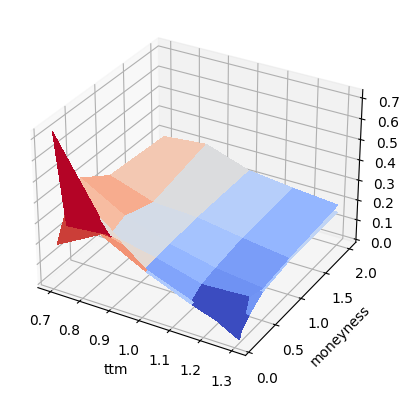

In [8]:
x = torch.from_numpy(data[10].reshape(1, 5, 5)).float().to(model_dense.device)
y = model_dense.forward(x)[0].detach().cpu().numpy().reshape((5,5))
plot_surface(data[10], y)

# Conv 2D VAE

In [9]:
config = {
    "seq_len": 1, 
    "feat_dim": (5, 5),
    "latent_dim": 10,
    "device": "cuda",
    "kl_weight": 1.0,
    "hidden": [50, 100],
}
model_conv = VAEConv2D(config)
print(model_conv)

VAEConv2D(
  (encoder): Conv2DEncoder(
    (encoder_layers): Sequential(
      (enc_conv_0): Conv2d(1, 50, kernel_size=(3, 3), stride=(2, 2), padding=(3, 3))
      (enc_activation_0): ReLU()
      (enc_conv_1): Conv2d(50, 100, kernel_size=(3, 3), stride=(2, 2), padding=(3, 3))
      (enc_activation_1): ReLU()
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (z_mean_layer): Linear(in_features=2500, out_features=10, bias=True)
    (z_log_var_layer): Linear(in_features=2500, out_features=10, bias=True)
  )
  (decoder): Conv2DDecoder(
    (decoder_input): Linear(in_features=10, out_features=2500, bias=True)
    (decoder_layers): Sequential(
      (dec_deconv_0): ConvTranspose2d(100, 50, kernel_size=(3, 3), stride=(2, 2), padding=(3, 3))
      (dec_activation_0): ReLU()
      (dec_final): ConvTranspose2d(50, 50, kernel_size=(3, 3), stride=(2, 2), padding=(3, 3))
      (dec_final_activation): ReLU()
      (dec_output): Conv2d(50, 1, kernel_size=(3, 3), stride=(1, 1), padding=same)

In [10]:
train(model_conv, train_dataloader, valid_dataloader, epochs=20, model_dir="test", file_name="conv2d_vae.pt")

eval: 100%|██████████| 63/63 [00:00<00:00, 617.57it/s]


epoch 0: train loss :: 0.032, dev loss :: 0.019, time elapsed :: 1.1192951202392578


eval: 100%|██████████| 63/63 [00:00<00:00, 765.76it/s]


epoch 1: train loss :: 0.027, dev loss :: 0.015, time elapsed :: 0.41847896575927734


eval: 100%|██████████| 63/63 [00:00<00:00, 648.79it/s]


epoch 2: train loss :: 0.022, dev loss :: 0.012, time elapsed :: 0.5405728816986084


eval: 100%|██████████| 63/63 [00:00<00:00, 572.20it/s]


epoch 3: train loss :: 0.016, dev loss :: 0.009, time elapsed :: 0.6174271106719971


eval: 100%|██████████| 63/63 [00:00<00:00, 552.73it/s]


epoch 4: train loss :: 0.012, dev loss :: 0.007, time elapsed :: 0.6092891693115234


eval: 100%|██████████| 63/63 [00:00<00:00, 649.47it/s]


epoch 5: train loss :: 0.010, dev loss :: 0.007, time elapsed :: 0.55438232421875


eval: 100%|██████████| 63/63 [00:00<00:00, 663.21it/s]


epoch 6: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.5005016326904297


eval: 100%|██████████| 63/63 [00:00<00:00, 700.12it/s]


epoch 7: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.48453807830810547


eval: 100%|██████████| 63/63 [00:00<00:00, 643.41it/s]


epoch 8: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.5131888389587402


eval: 100%|██████████| 63/63 [00:00<00:00, 665.93it/s]


epoch 9: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.515899658203125


eval: 100%|██████████| 63/63 [00:00<00:00, 650.94it/s]


epoch 10: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.5397799015045166


eval: 100%|██████████| 63/63 [00:00<00:00, 684.65it/s]


epoch 11: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.5094699859619141


eval: 100%|██████████| 63/63 [00:00<00:00, 656.21it/s]


epoch 12: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.5643215179443359


eval: 100%|██████████| 63/63 [00:00<00:00, 578.46it/s]


epoch 13: train loss :: 0.008, dev loss :: 0.007, time elapsed :: 0.5689022541046143


eval: 100%|██████████| 63/63 [00:00<00:00, 524.23it/s]


epoch 14: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.5546455383300781


eval: 100%|██████████| 63/63 [00:00<00:00, 636.36it/s]


epoch 15: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.5653603076934814


eval: 100%|██████████| 63/63 [00:00<00:00, 612.91it/s]


epoch 16: train loss :: 0.008, dev loss :: 0.007, time elapsed :: 0.5745143890380859


eval: 100%|██████████| 63/63 [00:00<00:00, 596.33it/s]


epoch 17: train loss :: 0.008, dev loss :: 0.007, time elapsed :: 0.5730128288269043


eval: 100%|██████████| 63/63 [00:00<00:00, 648.80it/s]


epoch 18: train loss :: 0.008, dev loss :: 0.007, time elapsed :: 0.47051358222961426


eval: 100%|██████████| 63/63 [00:00<00:00, 636.36it/s]

epoch 19: train loss :: 0.008, dev loss :: 0.007, time elapsed :: 0.42571568489074707
training finished, total time :: 11.224768877029419


In [11]:
test(model_conv, valid_dataloader, test_dataloader, "test/conv2d_vae.pt")

eval: 100%|██████████| 34/34 [00:00<00:00, 591.73it/s]

dev loss: 0.007, test_loss: 0.043


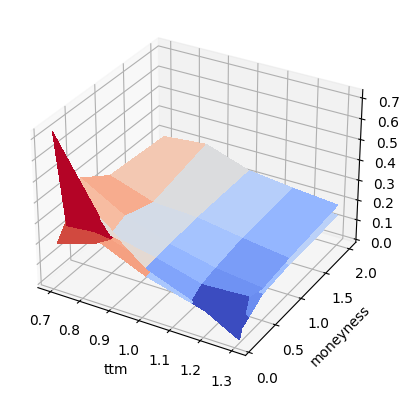

In [12]:
x = torch.from_numpy(data[10].reshape(1, 1, 5, 5)).float().to(model_conv.device)
y = model_conv.forward(x)[0].detach().cpu().numpy().reshape((5,5))
plot_surface(data[10], y)

# Conditional Conv 2D VAE

In [13]:
config = {
    "seq_len": 2, 
    "feat_dim": (5, 5),
    "latent_dim": 10,
    "device": "cuda",
    "kl_weight": 1.0,
    "hidden": [50, 100],
    "ctx_len": 1, 
    "ctx_hidden": [100], 
    "ctx_embedding": 100,
}
model_cond_conv = CVAE(config)
print(model_cond_conv)

CVAEConv2D(
  (encoder): CondConv2DEncoder(
    (encoder_layers): Sequential(
      (enc_conv_0): Conv2d(2, 50, kernel_size=(3, 3), stride=(2, 2), padding=(3, 3))
      (enc_activation_0): ReLU()
      (enc_conv_1): Conv2d(50, 100, kernel_size=(3, 3), stride=(2, 2), padding=(3, 3))
      (enc_activation_1): ReLU()
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (z_mean_layer): Linear(in_features=2500, out_features=10, bias=True)
    (z_log_var_layer): Linear(in_features=2500, out_features=10, bias=True)
  )
  (ctx_encoder): CondConv2DCtxEncoder(
    (ctx_encoder_layers): Sequential(
      (ctx_enc_conv_0): Conv2d(1, 100, kernel_size=(3, 3), stride=(2, 2), padding=(3, 3))
      (ctx_enc_activation_0): ReLU()
      (flatten): Flatten(start_dim=1, end_dim=-1)
      (ctx_enc_final_linear): Linear(in_features=2500, out_features=100, bias=True)
    )
  )
  (decoder): CondConv2DDecoder(
    (decoder_input): Linear(in_features=110, out_features=2500, bias=True)
    (decoder_layers)

In [14]:
train_dataset = VolSurfaceDataSet(data[:4000], 2)
train_dataloader = DataLoader(train_dataset, shuffle=False, batch_size=64)
valid_dataset = VolSurfaceDataSet(data[4000:5000], 2)
valid_dataloader = DataLoader(valid_dataset, shuffle=False, batch_size=16)
test_dataset = VolSurfaceDataSet(data[5000:], 2)
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=16)

In [15]:
train(model_cond_conv, train_dataloader, valid_dataloader, epochs=20, model_dir="test", file_name="condconv2d_vae.pt")

eval: 100%|██████████| 63/63 [00:00<00:00, 547.81it/s]


epoch 0: train loss :: 0.048, dev loss :: 0.031, time elapsed :: 0.5352253913879395


eval: 100%|██████████| 63/63 [00:00<00:00, 598.40it/s]


epoch 1: train loss :: 0.040, dev loss :: 0.022, time elapsed :: 0.5216896533966064


eval: 100%|██████████| 63/63 [00:00<00:00, 534.38it/s]


epoch 2: train loss :: 0.026, dev loss :: 0.011, time elapsed :: 0.5545189380645752


eval: 100%|██████████| 63/63 [00:00<00:00, 497.43it/s]


epoch 3: train loss :: 0.012, dev loss :: 0.007, time elapsed :: 0.5957133769989014


eval: 100%|██████████| 63/63 [00:00<00:00, 411.76it/s]


epoch 4: train loss :: 0.009, dev loss :: 0.007, time elapsed :: 0.6494452953338623


eval: 100%|██████████| 63/63 [00:00<00:00, 578.00it/s]


epoch 5: train loss :: 0.008, dev loss :: 0.007, time elapsed :: 0.6191082000732422


eval: 100%|██████████| 63/63 [00:00<00:00, 546.27it/s]


epoch 6: train loss :: 0.008, dev loss :: 0.006, time elapsed :: 0.576894998550415


eval: 100%|██████████| 63/63 [00:00<00:00, 546.96it/s]


epoch 7: train loss :: 0.008, dev loss :: 0.006, time elapsed :: 0.5339922904968262


eval: 100%|██████████| 63/63 [00:00<00:00, 542.62it/s]


epoch 8: train loss :: 0.008, dev loss :: 0.006, time elapsed :: 0.5256791114807129


eval: 100%|██████████| 63/63 [00:00<00:00, 490.76it/s]


epoch 9: train loss :: 0.008, dev loss :: 0.006, time elapsed :: 0.6498908996582031


eval: 100%|██████████| 63/63 [00:00<00:00, 490.54it/s]


epoch 10: train loss :: 0.008, dev loss :: 0.006, time elapsed :: 0.6478633880615234


eval: 100%|██████████| 63/63 [00:00<00:00, 547.81it/s]


epoch 11: train loss :: 0.007, dev loss :: 0.006, time elapsed :: 0.6181292533874512


eval: 100%|██████████| 63/63 [00:00<00:00, 547.83it/s]


epoch 12: train loss :: 0.007, dev loss :: 0.006, time elapsed :: 0.6349968910217285


eval: 100%|██████████| 63/63 [00:00<00:00, 446.73it/s]


epoch 13: train loss :: 0.007, dev loss :: 0.006, time elapsed :: 0.6556816101074219


eval: 100%|██████████| 63/63 [00:00<00:00, 547.86it/s]


epoch 14: train loss :: 0.007, dev loss :: 0.006, time elapsed :: 0.643319845199585


eval: 100%|██████████| 63/63 [00:00<00:00, 557.57it/s]


epoch 15: train loss :: 0.007, dev loss :: 0.006, time elapsed :: 0.62241530418396


eval: 100%|██████████| 63/63 [00:00<00:00, 467.05it/s]


epoch 16: train loss :: 0.007, dev loss :: 0.006, time elapsed :: 0.6834521293640137


eval: 100%|██████████| 63/63 [00:00<00:00, 616.80it/s]


epoch 17: train loss :: 0.007, dev loss :: 0.006, time elapsed :: 0.6692755222320557


eval: 100%|██████████| 63/63 [00:00<00:00, 439.13it/s]


epoch 18: train loss :: 0.007, dev loss :: 0.006, time elapsed :: 0.6353726387023926


eval: 100%|██████████| 63/63 [00:00<00:00, 600.28it/s]

epoch 19: train loss :: 0.007, dev loss :: 0.006, time elapsed :: 0.5801506042480469
training finished, total time :: 12.156348466873169


In [16]:
test(model_cond_conv, valid_dataloader, test_dataloader, "test/condconv2d_vae.pt")

eval: 100%|██████████| 34/34 [00:00<00:00, 588.08it/s]

dev loss: 0.006, test_loss: 0.041


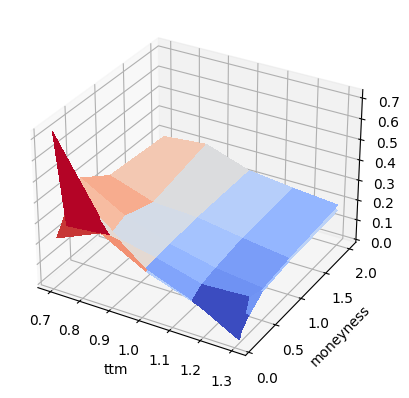

In [17]:
x = torch.from_numpy(data[9:11].reshape(1, 2, 5, 5)).float().to(model_cond_conv.device)
y = model_cond_conv(x)[0].detach().cpu().numpy().reshape((5,5))
plot_surface(data[10], y)

In [18]:
print(data[10])
print(y)

[[0.72464951 0.3797505  0.20524437 0.12131439 0.        ]
 [0.23808499 0.25893129 0.21339407 0.15409594 0.16549177]
 [0.41339477 0.29027929 0.21902075 0.16980012 0.14323103]
 [0.31220416 0.24044995 0.22961451 0.19413678 0.16450468]
 [0.28926708 0.3088492  0.23532392 0.20957814 0.18903915]]
[[0.21806654 0.30911678 0.18971041 0.11540468 0.02822617]
 [0.30855888 0.2724753  0.19685665 0.13750161 0.07407394]
 [0.30713832 0.2604339  0.20264336 0.15491265 0.12706482]
 [0.2908514  0.24804303 0.2065295  0.16815087 0.1474773 ]
 [0.25338346 0.2384867  0.21445926 0.18558602 0.16232213]]
